In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
import matplotlib.pyplot as plt

import thicket as th

In [18]:
tk = th.Thicket.from_caliperreader(glob("*-i3.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel"], axis=1)
tk.dataframe


Min time/rank  \
node                                      profile                     
{'name': 'main', 'type': 'function'}      26763113         3.370650   
                                          168475989       85.965073   
                                          400343355        0.107113   
                                          457055235        2.212054   
                                          482920368       14.108484   
...                                                             ...   
{'name': 'data_init', 'type': 'function'} 3792683717       0.314657   
                                          3823788390       2.880957   
                                          3923553048       0.042232   
                                          4023875631       0.001521   
                                          4174688090       0.205109   

                                                      Max time/rank  \
node                                      profile                     
{'name': 'main', 'type': 'function'}      26763113        19.133306   
                                          168475989      138.606554   
                                          400343355        0.210291   
                                          457055235       19.199884   
                                          482920368       49.762037   
...                                                             ...   
{'name': 'data_init', 'type': 'function'} 3792683717       0.314657   
                                          3823788390       2.880957   
                                          3923553048       0.042232   
                                          4023875631       0.001521   
                                          4174688090       0.205109   

                                                      Avg time/rank  \
node                                      profile                     
{'name': 'main', 'type': 'function'}      26763113         5.485712   
                                          168475989      112.285813   
                                          400343355        0.141943   
                                          457055235        8.347306   
                                          482920368       23.116953   
...                                                             ...   
{'name': 'data_init', 'type': 'function'} 3792683717       0.314657   
                                          3823788390       2.880957   
                                          3923553048       0.042232   
                                          4023875631       0.001521   
                                          4174688090       0.205109   

                                                       Total time  \
node                                      profile                   
{'name': 'main', 'type': 'function'}      26763113      43.885695   
                                          168475989    224.571627   
                                          400343355      0.567771   
                                          457055235   1068.455112   
                                          482920368     92.467813   
...                                                           ...   
{'name': 'data_init', 'type': 'function'} 3792683717     0.314657   
                                          3823788390     2.880957   
                                          3923553048     0.042232   
                                          4023875631     0.001521   
                                          4174688090     0.205109   

                                                      Variance time/rank  \
node                                      profile                          
{'name': 'main', 'type': 'function'}      26763113             26.616224   
                                          168475989           692.781365   
                                          400343355             0.001678   
    

In [19]:
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b465647f670>, 262144: <thicket.thicket.Thicket object at 0x2b4656553550>, 1048576: <thicket.thicket.Thicket object at 0x2b4656436df0>, 4194304: <thicket.thicket.Thicket object at 0x2b46589448e0>, 16777216: <thicket.thicket.Thicket object at 0x2b46589a9820>, 67108864: <thicket.thicket.Thicket object at 0x2b46589a9ee0>, 268435456: <thicket.thicket.Thicket object at 0x2b46563795b0>}


In [20]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)


In [21]:
ctk.dataframe

65536  \
                                                    Min time/rank   
node                                      num_procs                 
{'name': 'main', 'type': 'function'}      2              0.098834   
                                          4              0.107113   
                                          8              0.090231   
                                          16             0.076009   
                                          32             0.126988   
...                                                           ...   
{'name': 'data_init', 'type': 'function'} 16             0.001521   
                                          32             0.029642   
                                          64             0.001419   
                                          128            0.001414   
                                          256            0.013433   

                                                                   \
                                                    Max time/rank   
node                                      num_procs                 
{'name': 'main', 'type': 'function'}      2              0.134539   
                                          4              0.210291   
                                          8              0.286316   
                                          16             0.180118   
                                          32             0.470987   
...                                                           ...   
{'name': 'data_init', 'type': 'function'} 16             0.001521   
                                          32             0.029642   
                                          64             0.001419   
                                          128            0.001414   
                                          256            0.013433   

                                                                              \
                                                    Avg time/rank Total time   
node                                      num_procs                            
{'name': 'main', 'type': 'function'}      2              0.116686   0.233373   
                                          4              0.141943   0.567771   
                                          8              0.138531   1.108250   
                                          16             0.128059   2.048952   
                                          32             0.191423   6.125526   
...                                                           ...        ...   
{'name': 'data_init', 'type': 'function'} 16             0.001521   0.001521   
                                          32             0.029642   0.029642   
                                          64             0.001419   0.001419   
                                          128            0.001414   0.001414   
                                          256            0.013433   0.013433   

                                                                        \
                                                    Variance time/rank   
node                                      num_procs                      
{'name': 'main', 'type': 'function'}      2                   0.000319   
                                          4                   0.001678   
                                          8                   0.003596   
                                          16                  0.000877   
                                          32                  0.004125   
...                                                                ...   
{'name': 'data_init', 'type': 'function'} 16                  0.000000   
                                          32                  0.000000   
                                          64                  0.000000   
                                          128                 0.000000   
                                          2

In [22]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)


/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [23]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))


In [24]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
   # plt.yscale("log", base=10)
  #  plt.xscale("log", base=2)
    plt.xticks(num_procs)
    plt.show()
    return fig, ax


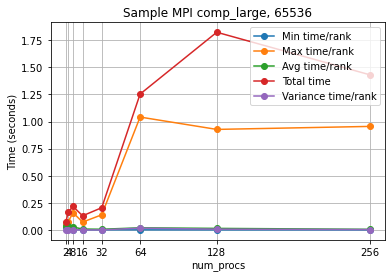

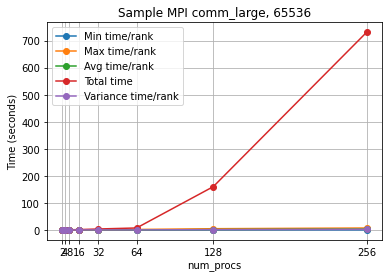

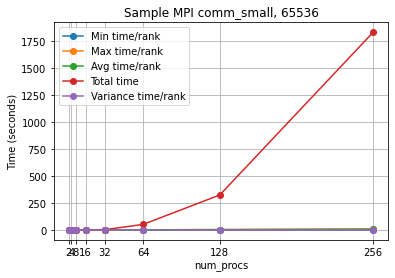

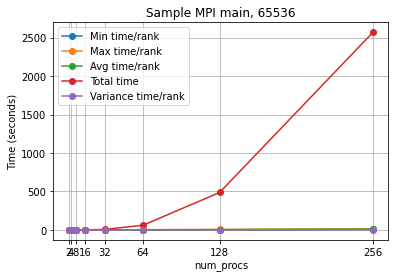

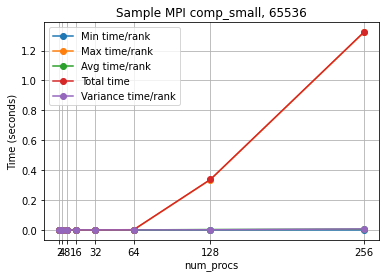

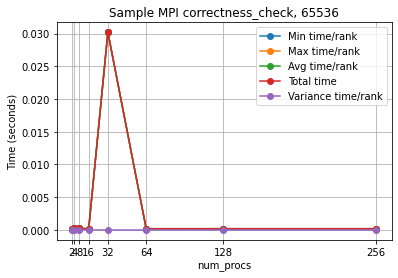

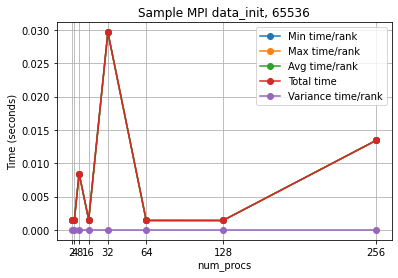

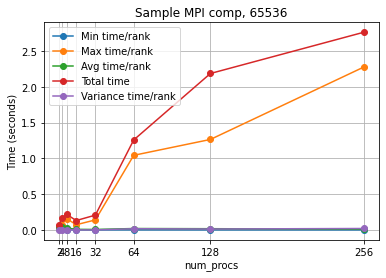

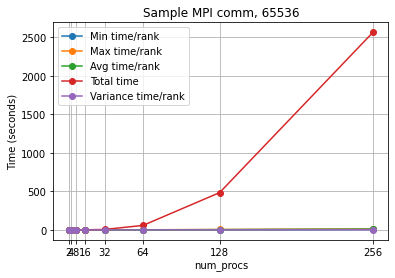

In [28]:
for name in function_names:
     for size in input_sizes:
        if (size == 65536):
            plot_mpl(
                df=ctk.dataframe.loc[name,size],
                title=f"Sample MPI {name}, {size}", 
                xlabel="num_procs",
                ylabel="Time (seconds)",
            )
